# User Engagement Analysis

In [1]:
#importing libraries for this operation
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from statistics import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# packages for path locations
import os
import sys
# package scripts in the script module folder 
sys.path.insert(0,'../scripts/')

In [3]:
df = pd.read_csv('../data/cleaned_telecom_data.csv')
df.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,...,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,3.674974e+13,4.806241e+14,5.173738e+14,1.835594e+13,2.905912e+12,3.701304e+12,1.570185e+12,1.785519e+13,...,47.0,1823652.0,1.823653e+09,76411.0,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9.16456699548519E+015,2.082014e+14,3.552121e+13
1,3.360100e+10,1,5.380039e+13,1.180289e+15,1.234090e+15,3.935912e+13,4.414096e+12,9.373850e+11,1.933278e+12,3.556554e+13,...,70.0,1365104.0,1.365104e+09,3728.0,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,2.788364e+13,6.904999e+14,7.183836e+14,3.442524e+13,1.022912e+13,3.363124e+12,1.726277e+12,2.375120e+13,...,70.0,1361762.0,1.361763e+09,0.0,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,4.332422e+13,1.595068e+15,1.638393e+15,3.653476e+13,1.181176e+13,2.070983e+12,6.574930e+11,1.509259e+13,...,70.0,1321509.0,1.321510e+09,41212.0,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,3.854281e+13,1.119848e+15,1.158391e+15,3.422225e+13,7.748843e+12,2.110349e+12,9.127880e+11,1.753980e+13,...,70.0,1089009.0,1.089009e+09,0.0,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


In the current dataset you’re expected to track the user’s engagement using the following engagement metrics:

sessions frequency
the duration of the session
the sessions total traffic (download and upload (bytes))

In [4]:
df['sessions frequency'] = df.groupby('MSISDN/Number')['no.of xDR sessions'].transform('sum')

In [9]:
df_new = df[['MSISDN/Number', 'Total UL and DL', 'Dur. (ms)', 'sessions frequency']]

In [10]:
df_new.head(10)

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
0,3.360100e+10,5.173738e+14,1823652.0,1
1,3.360100e+10,1.234090e+15,1365104.0,1
2,3.360100e+10,7.183836e+14,1361762.0,1
3,3.360101e+10,1.638393e+15,1321509.0,1
4,3.360101e+10,1.158391e+15,1089009.0,2
5,3.360101e+10,1.439738e+15,1074638.0,2
6,3.360101e+10,9.221408e+14,1035261.0,2
7,3.360101e+10,1.371765e+15,951292.0,1
8,3.360101e+10,1.076896e+15,941634.0,2
9,3.360102e+10,9.378444e+14,864482.0,1


# Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric.

In [11]:
df_new.describe()

,MSISDN/Number,Total UL and DL,Dur. (ms),sessions frequency
count,1.068560e+05,1.068560e+05,1.068560e+05,106856.000000
mean,4.511474e+10,9.166177e+14,9.662336e+04,1.403768
std,2.889423e+12,3.445153e+14,8.395441e+04,0.815371
min,3.360100e+10,5.836229e+13,7.142000e+03,1.000000
25%,3.365088e+10,6.691826e+14,4.085950e+04,1.000000
50%,3.366365e+10,9.166781e+14,8.639900e+04,1.000000
75%,3.368344e+10,1.164285e+15,1.188535e+05,2.000000
max,8.823971e+14,1.780674e+15,1.823652e+06,18.000000


# Top 10 customers on duration of session

In [12]:
# Top 10 customers on session frequency
df_new.sort_values(by='sessions frequency', ascending=False, inplace=True, ignore_index=True)
TopSessionfrq = df_new[['MSISDN/Number', 'sessions frequency']].head(10)

In [13]:
TopSessionfrq

,MSISDN/Number,sessions frequency
0,3.362632e+10,18
1,3.361489e+10,17
2,3.362578e+10,17
3,3.365973e+10,16
4,3.367588e+10,15
5,3.376054e+10,15
6,3.366716e+10,13
7,3.362708e+10,12
8,3.360452e+10,12
9,3.378632e+10,12


# Top 10 customers on Total Downloads and Uploads

In [14]:
#Top 10 customers on Total Downloads and Uploads
df_new.sort_values(by='Total UL and DL', ascending=False, inplace=True, ignore_index=True)
TopDLUL = df_new[['MSISDN/Number', 'Total UL and DL']].head(10)

In [15]:
TopDLUL

,MSISDN/Number,Total UL and DL
0,3.366005e+10,1.780674e+15
1,3.376118e+10,1.772824e+15
2,3.366881e+10,1.771882e+15
3,3.365100e+10,1.769959e+15
4,3.378510e+10,1.769330e+15
5,3.366871e+10,1.765674e+15
6,3.362335e+10,1.764959e+15
7,3.360657e+10,1.762451e+15
8,3.376217e+10,1.761169e+15
9,3.369842e+10,1.760919e+15


In [17]:
TopDLUL.to_csv('../data/top10_DLUL_users.csv')

# Normalizing selected columns

# Before Normalizing

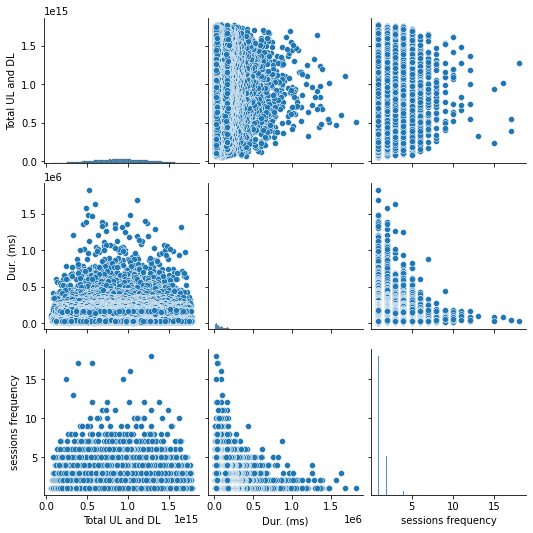

In [19]:
sns.pairplot(df[['Total UL and DL', 'Dur. (ms)', 'sessions frequency']])